In [1]:
import pandas as pd
import warnings
from openpyxl import load_workbook
import pandas as pd
import numpy as np
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
rc('font',family='AppleGothic')
# 경고 무시
warnings.simplefilter("ignore")


In [2]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
consumer = pd.read_excel('consumer_values.xlsx',engine='openpyxl',header=None)
consumer = consumer.iloc[2:4,:]
consumer.columns = consumer.iloc[0]
consumer = consumer.iloc[1:]
consumer = consumer.iloc[:,1:]
consumer.columns = [i.replace('월','') for i in consumer.columns]
A = consumer.iloc[0]
A = pd.to_numeric(A, errors='coerce')
A.astype(float)
A.head()

202002    97.8
202003    80.4
202004    73.3
202005    79.7
202006    83.7
Name: 3, dtype: float64

In [73]:
consumer=consumer.T

,3
202002,97.8
202003,80.4
202004,73.3
202005,79.7
202006,83.7
202007,85.9
202008,89.7
202009,81.4
202010,92.9
202011,99.0


In [5]:
A.info()

<class 'pandas.core.series.Series'>
Index: 39 entries, 202002 to 202304
Series name: 3
Non-Null Count  Dtype  
--------------  -----  
39 non-null     float64
dtypes: float64(1)
memory usage: 624.0+ bytes


In [6]:
cospi = pd.read_excel('코스피.xlsx',engine='openpyxl')
cospi = cospi.drop(cospi.columns[0], axis=1)
cospi.columns = [i.replace('.','') for i in cospi.columns]
B = cospi.iloc[0]
B.astype(float)
B.info()

<class 'pandas.core.series.Series'>
Index: 39 entries, 202002 to 202304
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
39 non-null     float64
dtypes: float64(1)
memory usage: 624.0+ bytes


# 코스피와 소비자심리지수와의 corr

In [7]:
corrAB = A.corr(B)
print(corrAB)

0.8415980240515305


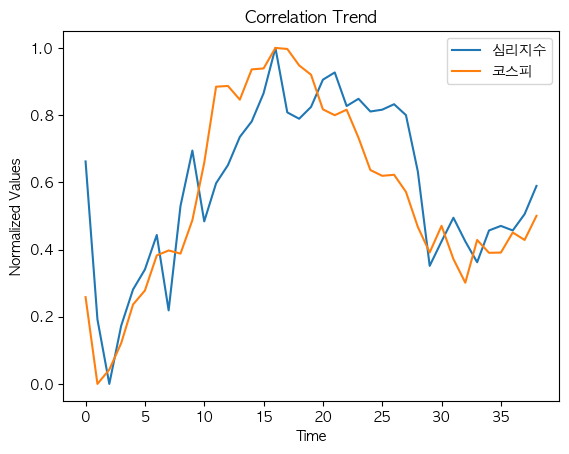

In [8]:
# 최소-최대 정규화
normalized_A = (A - A.min()) / (A.max() - A.min())
normalized_B = (B - B.min()) / (B.max() - B.min())

# 데이터 시각화
x = np.arange(len(A))  # x 축을 시간으로 가정
plt.plot(x, normalized_A, label='심리지수')
plt.plot(x, normalized_B, label='코스피')
plt.title('Correlation Trend')
plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()


In [79]:
import pandas as pd

# 데이터프레임 생성
df_normalized = pd.DataFrame({'normalized_A': normalized_A, 'normalized_B': normalized_B})

# 열 이름 치환
df_normalized = df_normalized.rename(columns={'normalized_A': '소비자심리지수', 'normalized_B': '코스피지수'})
df_normalized

,소비자심리지수,코스피지수
202002,0.662162,0.258335
202003,0.191892,0.000000
202004,0.000000,0.042679
202005,0.172973,0.121177
202006,0.281081,0.236316
202007,0.340541,0.277915
202008,0.443243,0.382453
202009,0.218919,0.397157
202010,0.529730,0.387852
202011,0.694595,0.487255


# 예금금리와 소비자심리지수와의 corr

In [9]:
depo = pd.read_excel('예금금리.xlsx',engine='openpyxl')
depo.columns = [i.replace('.','') for i in depo.columns]
depo = depo.set_index(depo.columns[0])

A = A.drop(A.index[-1])
for i in range(10):
    print(depo.index[i],end=' ')
    C = depo.iloc[i]
    print(A.corr(C))


　　　　　　　　　대기업대출 -0.3185045203474792
　　　　　　　　　중소기업대출 -0.33227674903295895
　　　　　　　　　운전자금대출 -0.31854014700506894
　　　　　　　　　시설자금대출 -0.330973977577628
　　　　　　　　　소액대출 (500만원 이하) -0.2829081205755835
　　　　　　　　　주택담보대출 -0.37373613130318495
　　　　　　　　　예・적금담보대출 -0.46013601701974777
　　　　　　　　　보증대출 -0.3842891987143586
　　　　　　　　　일반신용대출 3) -0.27838851824303523
　　　　　　　　　집단대출 3) -0.21878884170555996


In [11]:
normalized_depo = (depo - depo.min()) / (depo.max() - depo.min())

In [12]:
normalized_depo_T=normalized_depo.T

In [13]:
normalized_depo_T['소비자심리지수'] = normalized_A

In [25]:
df=normalized_depo_T.T

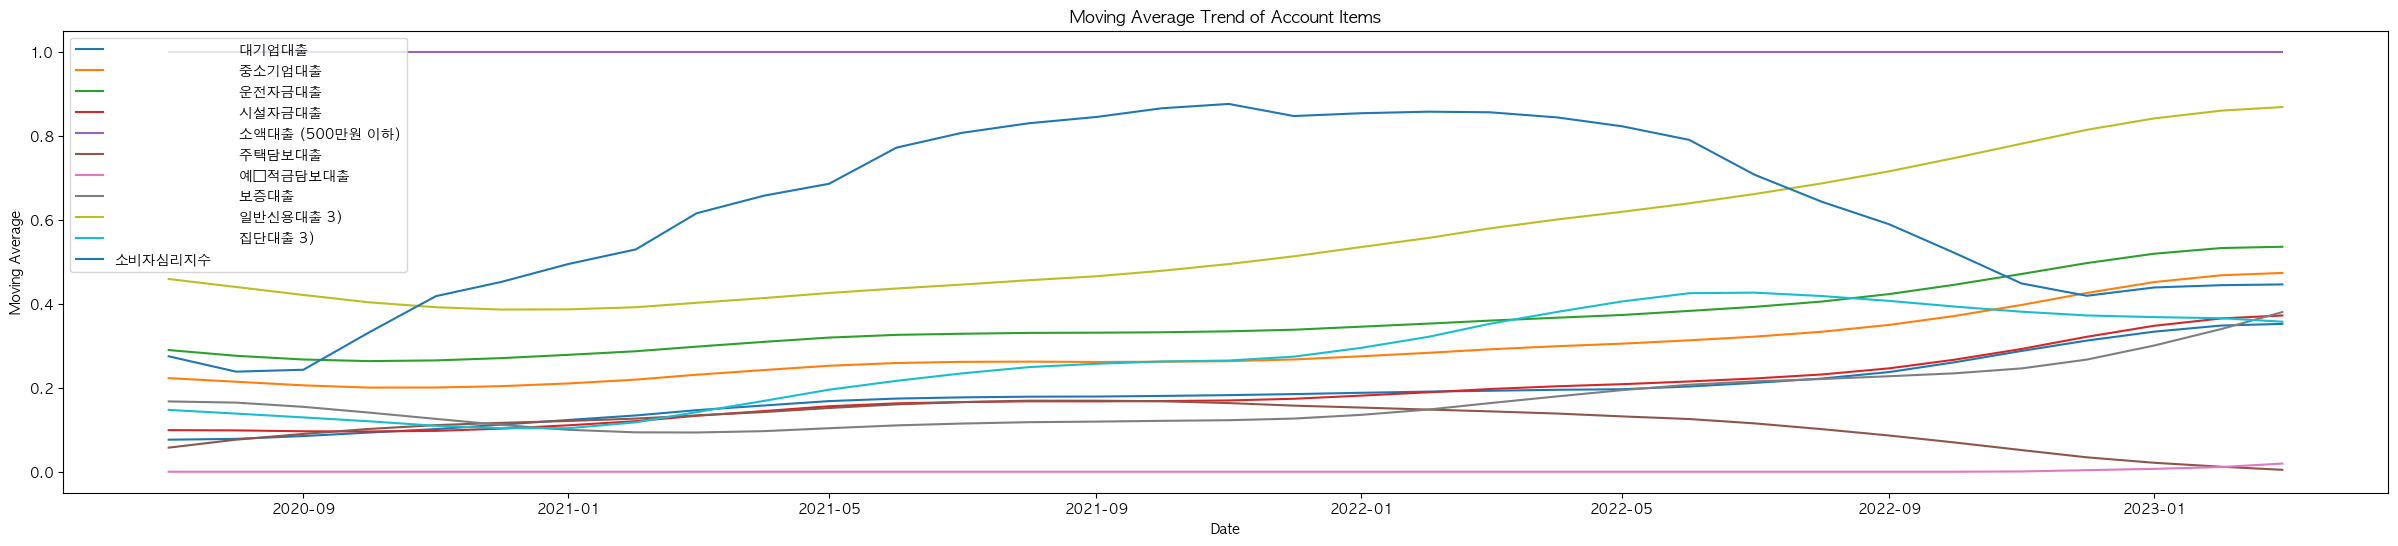

In [92]:
# 이동 평균을 계산하기 위해 pandas의 rolling 함수 사용
window_size = 6# 이동 평균 창 크기
df_ma = df.rolling(window_size).mean()

# 이동 평균 추세를 선 그래프로 그리기
plt.figure(figsize=(30, 6))
for column in df_ma.columns:
    plt.plot(df_ma.index, df_ma[column], label=column)

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Moving Average Trend of Account Items')
plt.legend()
plt.show()


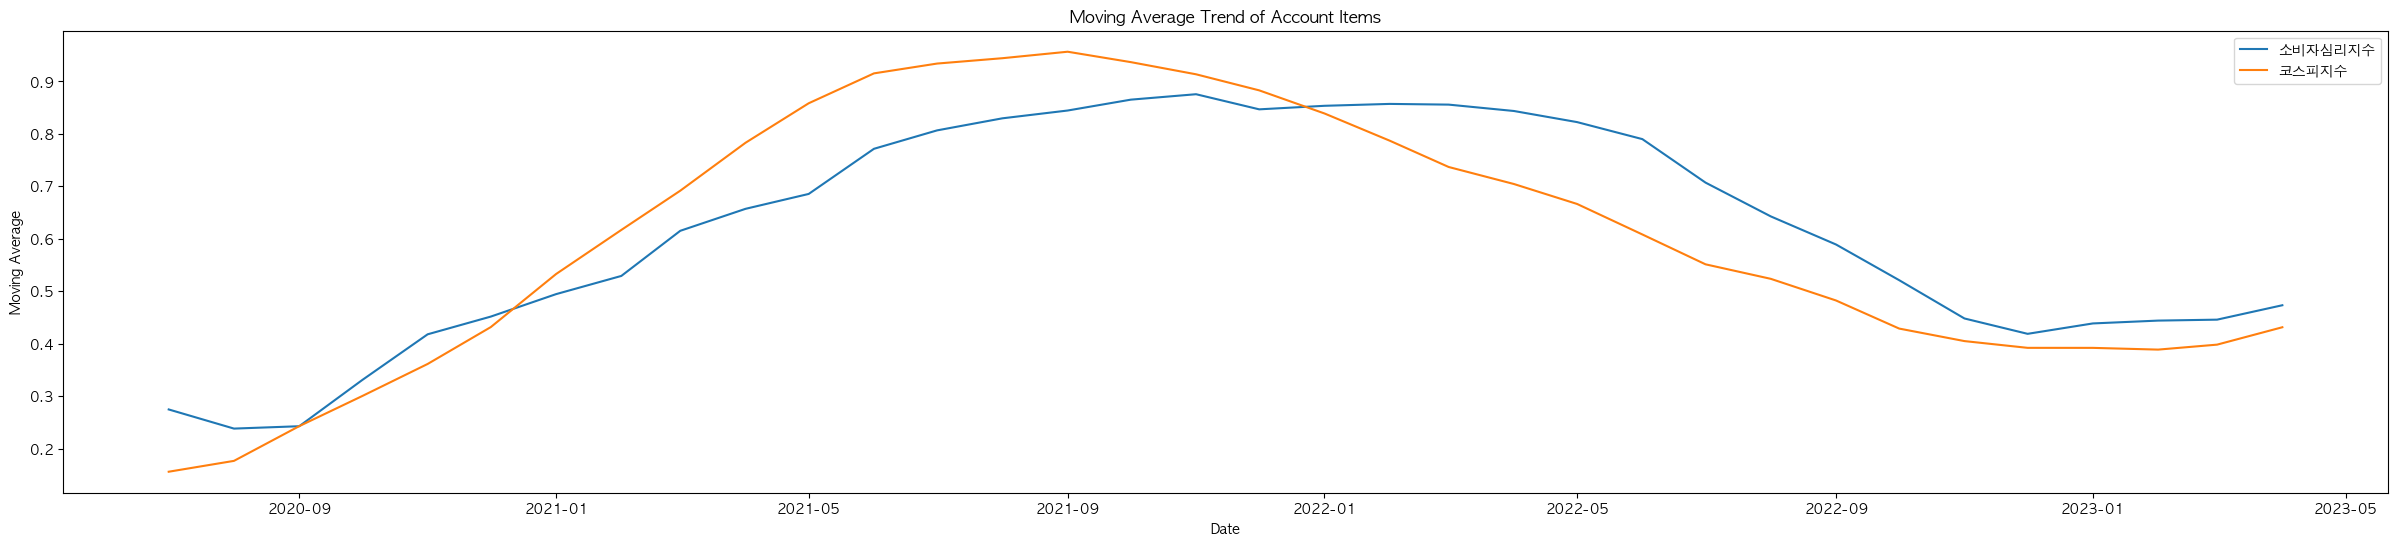

In [89]:
# 이동 평균을 계산하기 위해 pandas의 rolling 함수 사용
df_normalized.index = pd.to_datetime(df_normalized.index, format='%Y%m')
window_size = 6# 이동 평균 창 크기
df_ma = df_normalized.rolling(window_size).mean()

# 이동 평균 추세를 선 그래프로 그리기
plt.figure(figsize=(30, 6))
for column in df_ma.columns:
    plt.plot(df_ma.index, df_ma[column], label=column)

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Moving Average Trend of Account Items')
plt.legend()
plt.show()


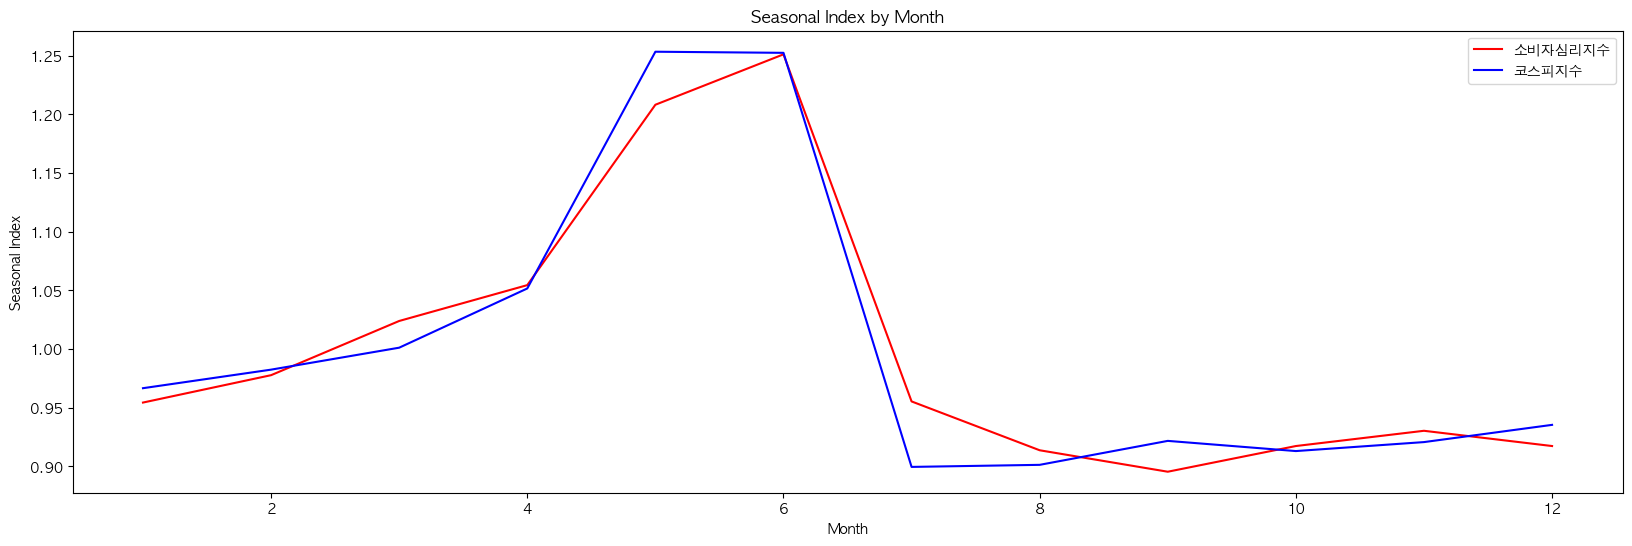

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임 인덱스를 날짜 형식으로 변환
df_normalized.index = pd.to_datetime(df_normalized.index, format='%Y%m')

# 계절성 지수를 계산할 기간 선택 (예: 12개월)
window_size = 6

# 계절성 지수를 계산하기 위해 이동 평균 사용
df_ma = df_normalized.rolling(window_size).mean()

# 계절성 지수를 계산할 계절을 선택 (예: 월별)
seasonal_period = 3

# 계절성 지수 계산
seasonal_index = df_ma.groupby(df_ma.index.month).mean() / df_ma.groupby(df_ma.index.month).mean().mean()

# 색상 지정을 위한 리스트
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan','black']

# 계절성 지수를 시각화
plt.figure(figsize=(20, 6))
for i, column in enumerate(seasonal_index.columns):
    plt.plot(seasonal_index.index, seasonal_index[column], label=column, color=colors[i])

plt.xlabel('Month')
plt.ylabel('Seasonal Index')
plt.title('Seasonal Index by Month')
plt.legend()
plt.show()



/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


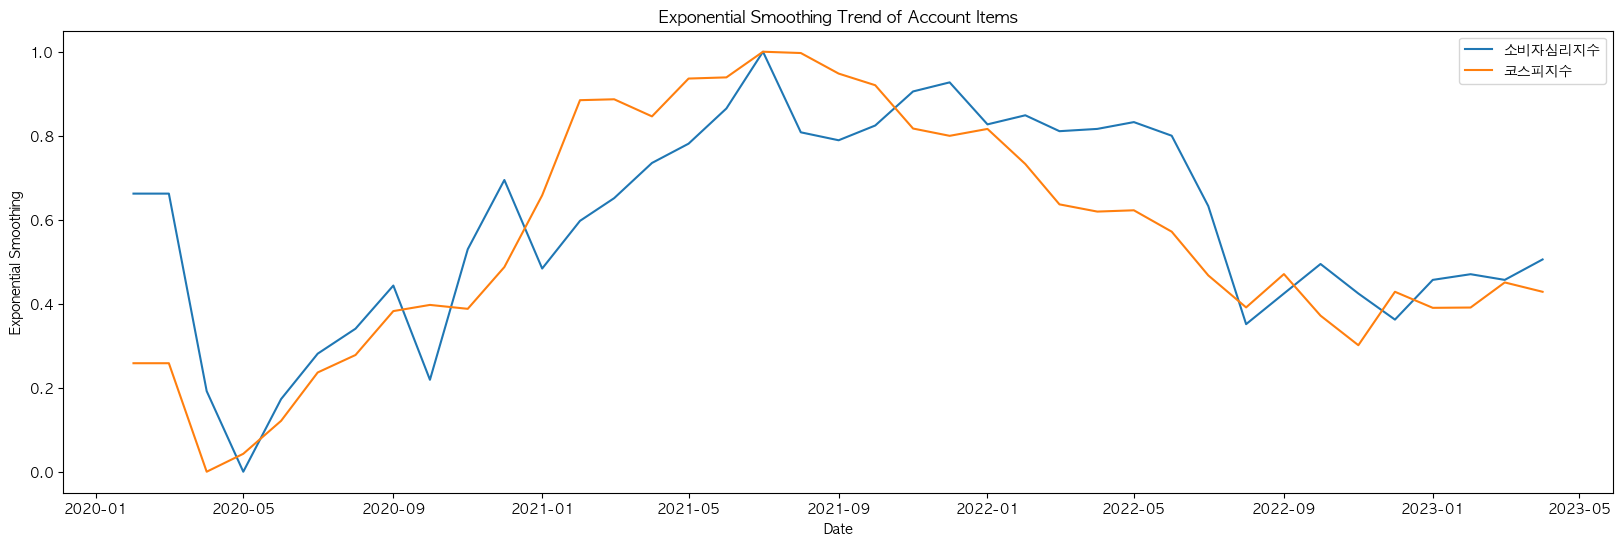

In [97]:
# 지수 평활법을 계산하기 위해 statsmodels 라이브러리 사용
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 지수 평활법을 적용한 추세를 선 그래프로 그리기
plt.figure(figsize=(20, 6))
for column in df_normalized.columns:
    model = SimpleExpSmoothing(df_normalized[column])
    fitted_model = model.fit()
    plt.plot(df_normalized.index, fitted_model.fittedvalues, label=column)

plt.xlabel('Date')
plt.ylabel('Exponential Smoothing')
plt.title('Exponential Smoothing Trend of Account Items')
plt.legend()
plt.show()


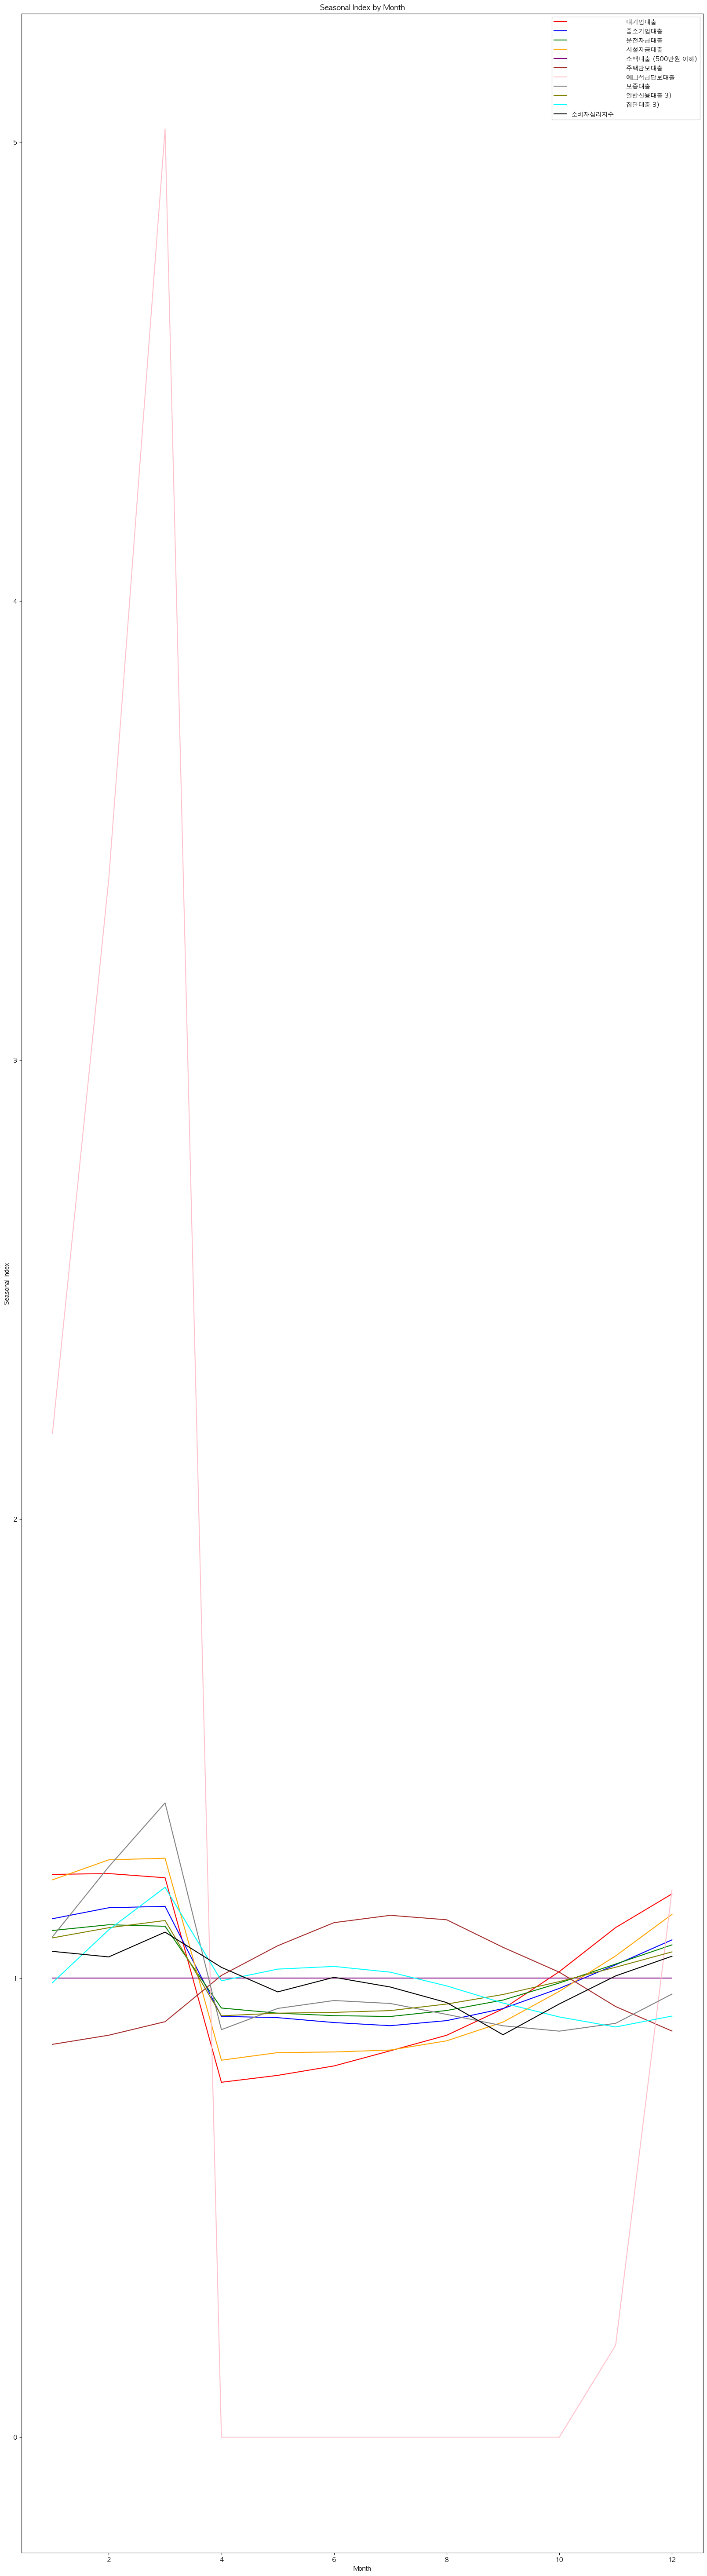

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임 인덱스를 날짜 형식으로 변환
df.index = pd.to_datetime(df.index, format='%Y%m')

# 계절성 지수를 계산할 기간 선택 (예: 12개월)
window_size = 3

# 계절성 지수를 계산하기 위해 이동 평균 사용
df_ma = df.rolling(window_size).mean()

# 계절성 지수를 계산할 계절을 선택 (예: 월별)
seasonal_period = 1

# 계절성 지수 계산
seasonal_index = df_ma.groupby(df_ma.index.month).mean() / df_ma.groupby(df_ma.index.month).mean().mean()

# 색상 지정을 위한 리스트
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan','black']

# 계절성 지수를 시각화
plt.figure(figsize=(20, 75))
for i, column in enumerate(seasonal_index.columns):
    plt.plot(seasonal_index.index, seasonal_index[column], label=column, color=colors[i])

plt.xlabel('Month')
plt.ylabel('Seasonal Index')
plt.title('Seasonal Index by Month')
plt.legend()
plt.show()


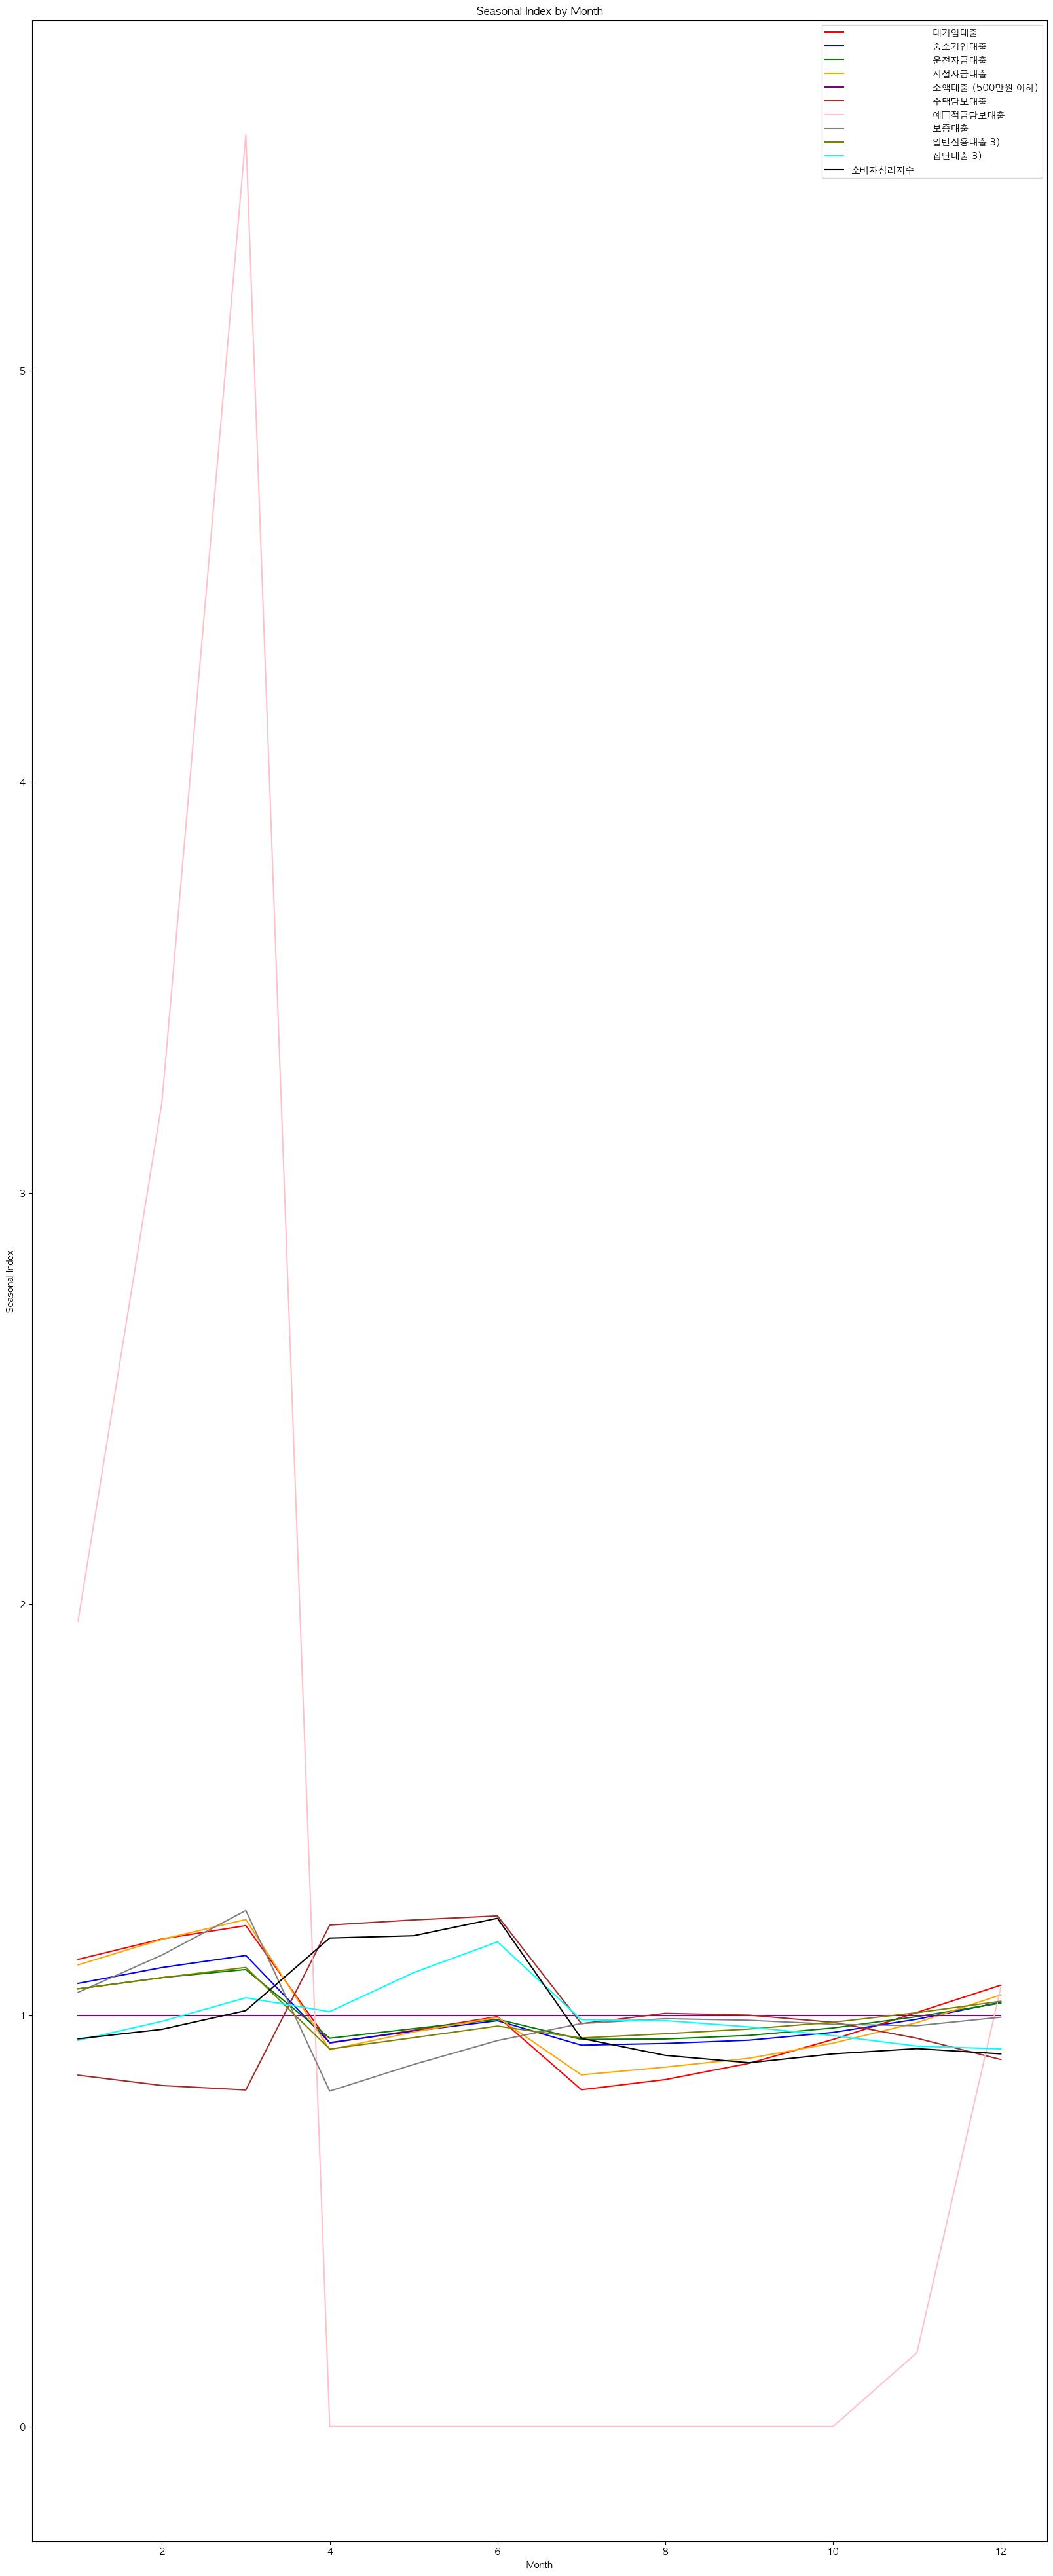

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임 인덱스를 날짜 형식으로 변환
df.index = pd.to_datetime(df.index, format='%Y%m')

# 계절성 지수를 계산할 기간 선택 (예: 12개월)
window_size = 6

# 계절성 지수를 계산하기 위해 이동 평균 사용
df_ma = df.rolling(window_size).mean()

# 계절성 지수를 계산할 계절을 선택 (예: 월별)
seasonal_period = 6

# 계절성 지수 계산
seasonal_index = df_ma.groupby(df_ma.index.month).mean() / df_ma.groupby(df_ma.index.month).mean().mean()

# 색상 지정을 위한 리스트
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan','black']

# 계절성 지수를 시각화
plt.figure(figsize=(20, 50))
for i, column in enumerate(seasonal_index.columns):
    plt.plot(seasonal_index.index, seasonal_index[column], label=column, color=colors[i])

plt.xlabel('Month')
plt.ylabel('Seasonal Index')
plt.title('Seasonal Index by Month')
plt.legend()
plt.show()


/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/songsiho/miniforge3/envs/data_science/lib/python3.9/s

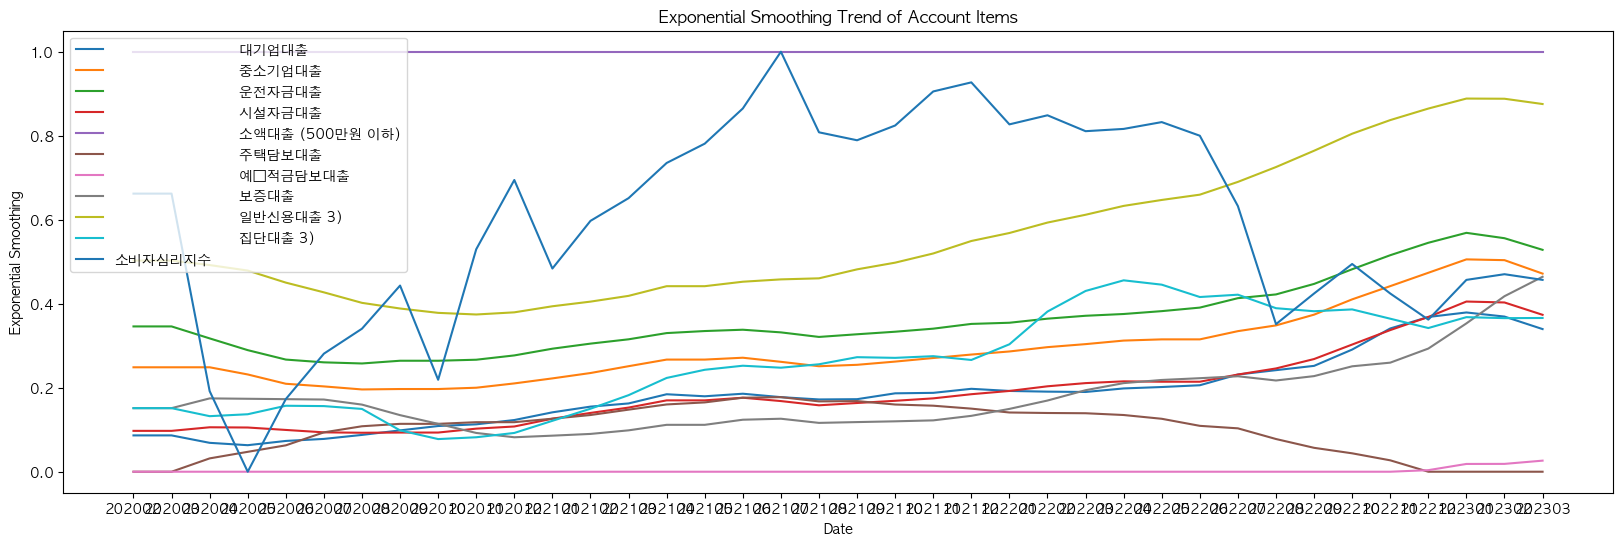

In [30]:
# 지수 평활법을 계산하기 위해 statsmodels 라이브러리 사용
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 지수 평활법을 적용한 추세를 선 그래프로 그리기
plt.figure(figsize=(20, 6))
for column in df.columns:
    model = SimpleExpSmoothing(df[column])
    fitted_model = model.fit()
    plt.plot(df.index, fitted_model.fittedvalues, label=column)

plt.xlabel('Date')
plt.ylabel('Exponential Smoothing')
plt.title('Exponential Smoothing Trend of Account Items')
plt.legend()
plt.show()


In [27]:
normalized_depo_T

,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
계정항목별,,,,,,,,,,,,,,,,,,,,,
대기업대출,0.086486,0.068783,0.063158,0.073298,0.078125,0.087629,0.098446,0.108808,0.112821,0.123077,...,0.231405,0.241803,0.252033,0.290837,0.341085,0.368421,0.379182,0.369403,0.339623,0.314394
중소기업대출,0.248649,0.248677,0.231579,0.209424,0.203125,0.195876,0.196891,0.196891,0.200000,0.210256,...,0.334711,0.348361,0.373984,0.410359,0.441860,0.473684,0.505576,0.503731,0.471698,0.443182
운전자금대출,0.345946,0.317460,0.289474,0.267016,0.260417,0.257732,0.264249,0.264249,0.266667,0.276923,...,0.413223,0.422131,0.447154,0.482072,0.515504,0.545113,0.568773,0.555970,0.528302,0.500000
시설자금대출,0.097297,0.105820,0.105263,0.099476,0.093750,0.092784,0.093264,0.093264,0.102564,0.107692,...,0.231405,0.245902,0.268293,0.302789,0.337209,0.368421,0.405204,0.402985,0.373585,0.344697
소액대출 (500만원 이하),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
주택담보대출,0.000000,0.031746,0.047368,0.062827,0.093750,0.108247,0.113990,0.113990,0.117949,0.117949,...,0.103306,0.077869,0.056911,0.043825,0.027132,0.000000,0.000000,0.000000,0.000000,0.000000
예・적금담보대출,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003759,0.018587,0.018657,0.026415,0.049242
보증대출,0.151351,0.174603,0.173684,0.172775,0.171875,0.159794,0.134715,0.113990,0.092308,0.082051,...,0.227273,0.217213,0.227642,0.250996,0.259690,0.293233,0.353160,0.417910,0.464151,0.492424
일반신용대출 3),0.502703,0.492063,0.478947,0.450262,0.427083,0.402062,0.388601,0.378238,0.374359,0.379487,...,0.690083,0.725410,0.764228,0.804781,0.837209,0.864662,0.888476,0.888060,0.875472,0.856061


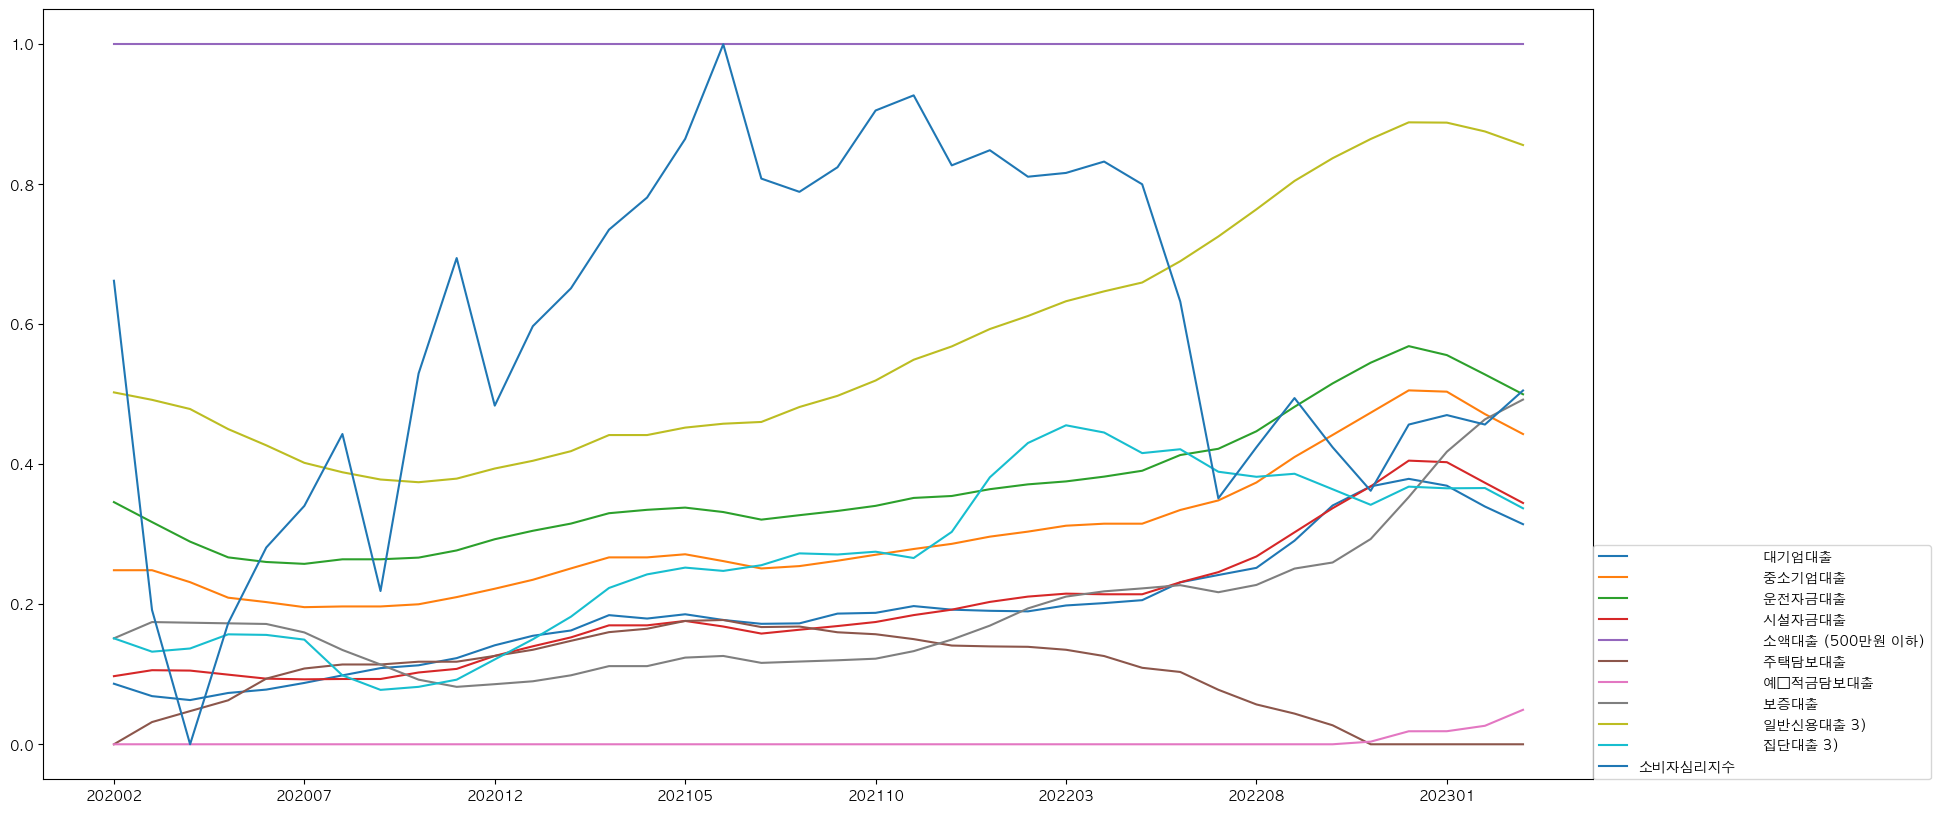

In [23]:
fig, ax = plt.subplots(1,1, figsize = (20, 10))

normalized_depo_T.T.plot(kind = 'line', ax = ax)

plt.legend(loc = (1,0))

In [17]:
normalized_depo_T

,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
계정항목별,,,,,,,,,,,,,,,,,,,,,
대기업대출,0.086486,0.068783,0.063158,0.073298,0.078125,0.087629,0.098446,0.108808,0.112821,0.123077,...,0.231405,0.241803,0.252033,0.290837,0.341085,0.368421,0.379182,0.369403,0.339623,0.314394
중소기업대출,0.248649,0.248677,0.231579,0.209424,0.203125,0.195876,0.196891,0.196891,0.200000,0.210256,...,0.334711,0.348361,0.373984,0.410359,0.441860,0.473684,0.505576,0.503731,0.471698,0.443182
운전자금대출,0.345946,0.317460,0.289474,0.267016,0.260417,0.257732,0.264249,0.264249,0.266667,0.276923,...,0.413223,0.422131,0.447154,0.482072,0.515504,0.545113,0.568773,0.555970,0.528302,0.500000
시설자금대출,0.097297,0.105820,0.105263,0.099476,0.093750,0.092784,0.093264,0.093264,0.102564,0.107692,...,0.231405,0.245902,0.268293,0.302789,0.337209,0.368421,0.405204,0.402985,0.373585,0.344697
소액대출 (500만원 이하),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
주택담보대출,0.000000,0.031746,0.047368,0.062827,0.093750,0.108247,0.113990,0.113990,0.117949,0.117949,...,0.103306,0.077869,0.056911,0.043825,0.027132,0.000000,0.000000,0.000000,0.000000,0.000000
예・적금담보대출,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003759,0.018587,0.018657,0.026415,0.049242
보증대출,0.151351,0.174603,0.173684,0.172775,0.171875,0.159794,0.134715,0.113990,0.092308,0.082051,...,0.227273,0.217213,0.227642,0.250996,0.259690,0.293233,0.353160,0.417910,0.464151,0.492424
일반신용대출 3),0.502703,0.492063,0.478947,0.450262,0.427083,0.402062,0.388601,0.378238,0.374359,0.379487,...,0.690083,0.725410,0.764228,0.804781,0.837209,0.864662,0.888476,0.888060,0.875472,0.856061


# 환율과 소비자심리지수와의 corr

In [ ]:
exchange = pd.read_csv('환율.csv')
exchange = exchange.set_index('날짜')['종가']
D = pd.Series(exchange)
D.index = pd.to_datetime(D.index).strftime('%Y%m')
D = D.str.replace(',','').astype(float)
print(A.corr(D))

# 비트코인(종가)와 소비자심리지수와의 corr

In [ ]:
bitcoin = pd.read_csv('bitcoin.csv')
bitcoin1 = bitcoin.set_index('날짜')['종가']
bitcoin1 = pd.Series(bitcoin1)
formatted_index = [pd.to_datetime(idx, format='%Y년 %m월').strftime('%Y%m') for idx in bitcoin1.index]
bitcoin1.index = formatted_index
bitcoin1 = bitcoin1.str.replace(',','').astype(float)
E = bitcoin1[::-1]
E = E.drop(E.index[-1])
print(A.corr(E))

# 비트코인(매수량)와 소비자심리지수와의 corr

In [ ]:
def convert_value(value):
    if "B" in value:
        return float(value.replace("B", "")) * 1000
    elif "M" in value:
        return float(value.replace("M", ""))
    else:
        return float(value)

bitcoin = pd.read_csv('bitcoin.csv')
bitcoin2 = bitcoin.set_index('날짜')['거래량']
bitcoin2 = pd.Series(bitcoin2)
formatted_index = [pd.to_datetime(idx, format='%Y년 %m월').strftime('%Y%m') for idx in bitcoin2.index]
bitcoin2.index = formatted_index
bitcoin2 = bitcoin2.apply(convert_value)
F = bitcoin2[::-1]
F = F.drop(F.index[-1])
print(A.corr(F))

# 유가와 소비자심리지수와의 corr

In [ ]:
oil = pd.read_excel('유가.xlsx')
oil

In [ ]:
oil = pd.read_excel('유가.xlsx')
oil = oil.drop(oil.columns[0], axis=1)
oil = oil.drop(oil.columns[0], axis=1)
oil
oil.columns = [i.replace('.','') for i in oil.columns]
G = oil.iloc[0]
G.astype(float)
print(A.corr(G))

# 물가지수와 소비자심리지수와의 corr

In [ ]:
price = pd.read_excel('물가지수.xlsx')
price = price.drop(price.columns[0], axis=1)
price.columns = [i.replace('.','') for i in price.columns]
price = price.set_index(price.columns[0])

for i in range(13):
    print(price.index[i],end=' ')
    H = price.iloc[i]
    H.astype(float)
    print(A.corr(H))


# 월간 카드 실적과 소비자심리지수와의 corr

In [ ]:
card = pd.read_excel('월간_국내카드승인실적.xlsx')
card.columns = [i.replace('.','') for i in card.columns]
card = card.set_index(card.columns[0])

for j in range(8):
    print(card.index[j],end=' ')
    I = card.iloc[j]
    I.astype(float)
    print(A.corr(I)) 

## 교육서비스업이 가장 높음

# 전월세 지수와 소비자심리지수와의 corr

In [ ]:
house = pd.read_excel('전월세통합지수.xlsx')
house.columns = [i.replace('.','') for i in house.columns]
house = house.set_index(house.columns[0])
house = house.drop(house.columns[0], axis=1)

for i in range(4):
    print(house.index[i],end=' ')
    J = house.iloc[i]
    J.astype(float)
    print(A.corr(J)) 

# 공사완료후 미분양현황과의 corr

In [ ]:
unsold = pd.read_excel('공사완료후_미분양현황.xlsx')
unsold.columns = [i.replace('.','') for i in unsold.columns]
unsold = unsold.drop(unsold.columns[0], axis=1)
unsold = unsold.drop(unsold.columns[0], axis=1)
unsold = unsold.drop([0,1])
unsold = unsold.astype(float)
unsold = unsold.iloc[0]
print(A.corr(unsold))



## 사교육(교육비)는  월별 데이터 없음

# 상관관계 높은 항목들은 1,3,5개월 단위로 묶어보고 언제 가장 예측이 잘 될 지

## 코스피 회귀분석

In [ ]:
consumer = pd.read_excel('consumer_values.xlsx',engine='openpyxl',header=None)
consumer = consumer.iloc[2:4,:]
consumer.columns = consumer.iloc[0]
consumer = consumer.iloc[1:]
consumer = consumer.iloc[:,1:]
consumer.columns = [i.replace('월','') for i in consumer.columns]
A = consumer.iloc[0]
A = pd.to_numeric(A, errors='coerce')
A.astype(float)

cospi = pd.read_excel('코스피.xlsx',engine='openpyxl')
cospi = cospi.drop(cospi.columns[0], axis=1)
cospi.columns = [i.replace('.','') for i in cospi.columns]
B = cospi.iloc[0]
B.astype(float)

In [ ]:
print(A.corr(B))

In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:

# 시리즈 데이터를 데이터프레임으로 변환
df = pd.DataFrame({'A': pd.Series(A), 'B': pd.Series(B)})

# 상수항 추가
df['Intercept'] = 1

# 회귀분석 모델 생성
model = sm.OLS(df['A'], df[['B', 'Intercept']])

# 회귀분석 수행
result = model.fit()

# 회귀분석 결과 출력
print(result.summary())

### R-squared (R제곱): R제곱은 모델이 종속 변수의 변동을 얼마나 설명할 수 있는지를 나타내는 지표.
### R제곱 값은 0과 1 사이의 값을 가지며, 값이 1에 가까울수록 모델이 데이터를 잘 설명한다는 의미.
### 0.708

### p-value 값이 0.05보다 작음 -> 통계적 유의미성

In [ ]:
import matplotlib.dates as mdates

dates = pd.to_datetime(A.index, format='%Y%m')
# 최소-최대 정규화
normalized_A = (A - A.min()) / (A.max() - A.min())
normalized_B = (B - B.min()) / (B.max() - B.min())

# 데이터 시각화
plt.figure(figsize=(16,8))
plt.plot(dates, normalized_A, label='심리지수')
plt.plot(dates, normalized_B, label='코스피')

plt.title('Correlation Trend')
plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.legend()
# x 축 레이블 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 그래프 출력
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

### Granger 인과성 테스트: 코스피 지수와 소비자심리지수 사이의 인과 관계를 조사할 수 있습니다. Granger 인과성 테스트를 사용하여 한 시계열이 다른 시계열을 예측하는 데 유의한 영향을 미치는지 확인할 수 있습니다.

In [ ]:
# Granger 인과성 분석 수행
result = grangercausalitytests(pd.concat([A, B], axis=1), maxlag=2, verbose=False)

# 결과 출력
for lag in result.keys():
    print(f"Lag Order: {lag}")
    print(f"Granger Causality p-value: {result[lag][0]['ssr_ftest'][1]}")
    print("---------------------------")


## Lag Order1 ->귀무가설 기각
## Lag Order2 -> A가 B를 예측하는 데 기여
# 코스피 지수의 과거 값이 소비자 심리지수의 현재 값을 예측하는 데 유의미한 정보를 제공한다는 것을 의미

### 소비자심리지수는 설문조사이기때문에 산출하는데 소요되는 시간적, 비용적 cost가 존재함 
## => 과거 코스피지수와 다음달 심리지수의 상관관계 살펴보기

In [ ]:
consumer = pd.read_excel('consumer_values.xlsx',engine='openpyxl',header=None)
consumer = consumer.iloc[2:4,:]
consumer.columns = consumer.iloc[0]
consumer = consumer.iloc[1:]
consumer = consumer.iloc[:,1:]
consumer.columns = [i.replace('월','') for i in consumer.columns]
A = consumer.iloc[0]
A = pd.to_numeric(A, errors='coerce')
A.astype(float)
A_pd = pd.DataFrame({'A':A})
shifted = A_pd.shift(1, axis=0)
shifted = shifted.drop(A.index[0])
shifted = shifted.drop(A.index[-1])
shifted = shifted.squeeze()
shifted_B = B.drop(B.index[0])
shifted_B = shifted_B.drop(shifted_B.index[-1])

print(shifted.corr(shifted_B))

In [ ]:
# 더 낮음

In [ ]:
consumer = pd.read_excel('consumer_values.xlsx',engine='openpyxl',header=None)
consumer = consumer.iloc[2:4,:]
consumer.columns = consumer.iloc[0]
consumer = consumer.iloc[1:]
consumer = consumer.iloc[:,1:]
consumer.columns = [i.replace('월','') for i in consumer.columns]
A = consumer.iloc[0]
A = pd.to_numeric(A, errors='coerce')
A.astype(float)
A_pd = pd.DataFrame({'A':A})
shifted = A_pd.shift(2, axis=0)
shifted = shifted.drop(shifted.index[0])
shifted = shifted.drop(shifted.index[0])
shifted = shifted.squeeze()
shifted_B = B.drop(B.index[0])
shifted_B = shifted_B.drop(shifted_B.index[0])

print(shifted.corr(shifted_B))

In [ ]:
# 두 달 전은 더 낮음

In [ ]:
print(B.corr(E))

In [ ]:
소비자물가지수에 따라서 가장 영향을 많이 받는 품목을 구해서, 코스피지수를 통한 판매전략. 